In [432]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
def ratio_to_weight(df_ratio, n=2, weight=0.05):
    
    df = df_ratio.copy()
    for index, row in df.iterrows():
        # ticker not to take into account when weight in indice is NaN
        for ticker, value in row.items():   
            if pd.isna(indice_weight.at[index, ticker]):
                row.at[ticker] = np.nan

        all_tickers = list(row.index)
        largest_tickers = list(row.nlargest(n).index)
        smallest_tickers = list(row.nsmallest(n).index)
        other_tickers = list(set(all_tickers).difference(largest_tickers + smallest_tickers))
        df.at[index, largest_tickers] = weight
        df.at[index, smallest_tickers] = - weight
        df.at[index, other_tickers] = 0
        
    return df

In [417]:
def plot_comparison(perf_weighted1, perf_weighted2):
    indice_price1 = 100 * ((perf_weighted1.sum(axis=1) + 1).cumprod())
    indice_price2 = 100 * ((perf_weighted2.sum(axis=1) + 1).cumprod())
    indice_price = pd.concat([indice_price1, indice_price2], axis=1)
    indice_price.plot()

In [130]:
indice_weight = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='raw_weight', skiprows=[1])
indice_weight.drop(columns='Unnamed: 1', inplace=True)
indice_weight_unpivot = indice_weight.melt(id_vars=['TICKER'], var_name='date', value_name='weight')
indice_weight = indice_weight.set_index('TICKER')
indice_weight.index.name = 'Dates'
indice_weight = indice_weight.T
indice_weight.index = pd.to_datetime(indice_weight.index, format='%m/%d/%Y')
indice_weight = indice_weight / 100
indice_weight.head()

Dates,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2005-12-30,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-31,0.0520,0.0024,0.0151,0.0055,0.0225,0.0771,0.3555,0.0015,0.4683,NaN
2006-02-28,0.0502,0.0023,0.0144,0.0053,0.0218,0.0897,0.3282,0.0014,0.4868,NaN
2006-03-31,0.0557,0.0027,0.0143,0.0058,0.0243,0.0999,0.3179,0.0015,0.4778,NaN
2006-04-28,0.0569,0.0027,0.0163,0.0057,0.0237,0.1048,0.3165,0.0016,0.4718,NaN


In [379]:
tickers_perf = pd.read_excel('SW_data/Insurances.xlsx', sheet_name='performance', skiprows=[0,1,2,4,5,6], index_col=0)
tickers_perf = tickers_perf / 100
tickers_perf.iloc[0] = 0
tickers_perf.head()

,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.001954,0.019146,0.030576,0.013846,0.020690,0.018931,0.008836,-0.026429,0.021429,0.008836
2006-01-04,0.012354,-0.008671,-0.022688,-0.013657,0.027027,0.000826,0.011850,0.027146,0.027972,0.011850
2006-01-05,-0.010918,0.026239,0.003571,0.000000,-0.016447,0.000825,-0.011202,0.007143,-0.014456,-0.011202
2006-01-06,-0.007792,0.005682,-0.001779,0.000000,0.003344,0.001649,0.009784,0.007143,-0.002588,0.009784


In [380]:
all_df_ratio = pd.read_excel('SW_data/ratio_data.xlsx', sheet_name=None, skiprows=[0,1,2,4,5], parse_dates=True, index_col=0)


In [453]:
def excel_to_total_weight (all_df_ration, n=2, weight=0.05):
    nbr_sheet = len(list(all_df_ratio.values()))
    for i in range(nbr_sheet):
        df = list(all_df_ratio.values())[i].copy()
        df.dropna(how='all')
        sheet_name = list(all_df_ratio.keys())[i]
        # df.set_index(keys=df.columns[0], inplace=True, drop=True)
        df.index.name = 'Date'
        df.fillna(method='ffill', inplace=True)
        df = df.reindex(index=indice_weight.index, method='ffill')
        ratio_weight_temp = ratio_to_weight(df, n=n, weight=weight)
        if i == 0:
            ratio_weight = ratio_weight_temp
        else:
            ratio_weight = ratio_weight.add(ratio_weight_temp)
            
    return ratio_weight

In [454]:
indice_price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())

In [455]:
def strategie_stats(perf_weighted):
    indice_price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    # total_return = (indice_price.iloc[-1] - indice_price.iloc[0]) / indice_price.iloc[0]
    total_return = (perf_weighted.sum(axis=1) + 1).product() - 1
    total_std = perf_weighted.sum(axis=1).std() * np.sqrt(252)
    print('total return from 2006 :', round(100 * total_return, 2), '%')
    print('annualized standard deviation from 2006 :', round(100 * total_std, 2), '%')
    indice_price.plot()

total return from 2006 : 211.92 %
annualized standard deviation from 2006 : 24.39 %


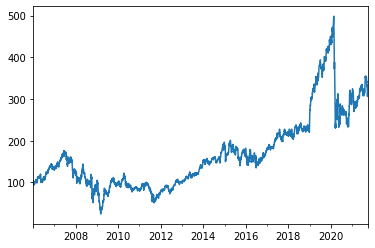

In [456]:
# indice statistics
indice_weight_all = indice_weight.reindex(index=tickers_perf.index, method='ffill')
perf_weighted = tickers_perf.mul(indice_weight_all)
indice_price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
strategie_stats(perf_weighted)

In [457]:
# strategie statistics
ratio_weight = excel_to_total_weight(all_df_ratio)
new_weight = indice_weight.add(ratio_weight)
new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
perf_weighted_new = tickers_perf.mul(new_weight_all)

total return from 2006 : 382.05 %
annualized standard deviation from 2006 : 26.3 %


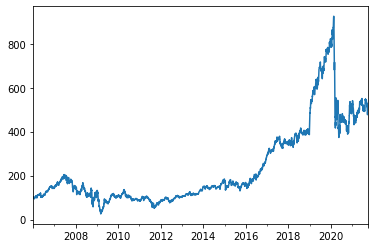

In [414]:
strategie_stats(perf_weighted_new)

In [458]:
N = 3
weight = 0.05
df_n_prices = pd.DataFrame()
for n in range(1,N+1):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=weight)
    new_weight = indice_weight.add(ratio_weight)
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['n=' + str(n)] = price


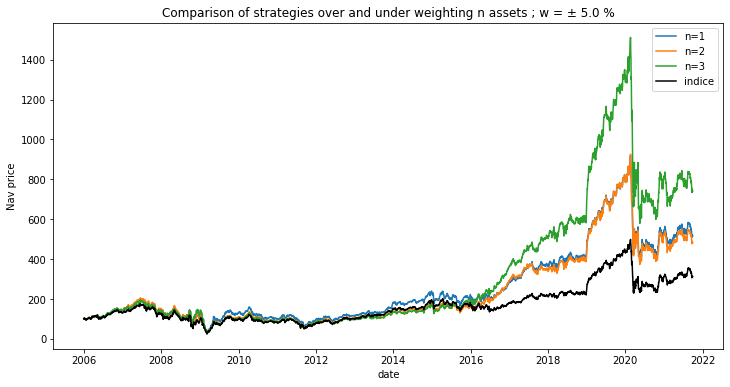

In [461]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_n_prices, lw=1.5, palette='tab10', dashes=False)
sns.lineplot(data=indice_price, lw=1.5, label='indice', color='black')
plt.title('Comparison of strategies over and under weighting n assets ; w = ± ' + str(100 * weight) + ' %')
plt.xlabel('date')
plt.ylabel('Nav price')
plt.show()

In [464]:
N = 3
weight = 0.025
df_n_prices = pd.DataFrame()
for n in range(1,N+1):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=weight)
    new_weight = indice_weight.add(ratio_weight)
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['n=' + str(n)] = price


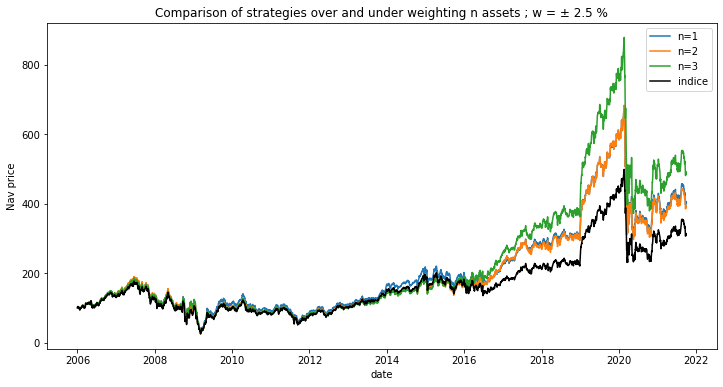

In [465]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_n_prices, lw=1.5, palette='tab10', dashes=False)
sns.lineplot(data=indice_price, lw=1.5, label='indice', color='black')
plt.title('Comparison of strategies over and under weighting n assets ; w = ± ' + str(100 * weight) + ' %')
plt.xlabel('date')
plt.ylabel('Nav price')
plt.show()

In [473]:
n = 2
df_n_prices = pd.DataFrame()
for w in list(np.linspace(0,0.1,5)):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=w)
    new_weight = indice_weight.add(ratio_weight)
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['w=' + str(round(w,3))] = price


In [476]:
new_weight_all

Dates,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2006-01-02,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-03,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-04,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-05,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-06,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-23,-0.3397,NaN,0.1331,NaN,NaN,-0.2621,NaN,0.3039,0.7453,0.4195
2021-09-24,-0.3397,NaN,0.1331,NaN,NaN,-0.2621,NaN,0.3039,0.7453,0.4195
2021-09-25,-0.3397,NaN,0.1331,NaN,NaN,-0.2621,NaN,0.3039,0.7453,0.4195
2021-09-26,-0.3397,NaN,0.1331,NaN,NaN,-0.2621,NaN,0.3039,0.7453,0.4195


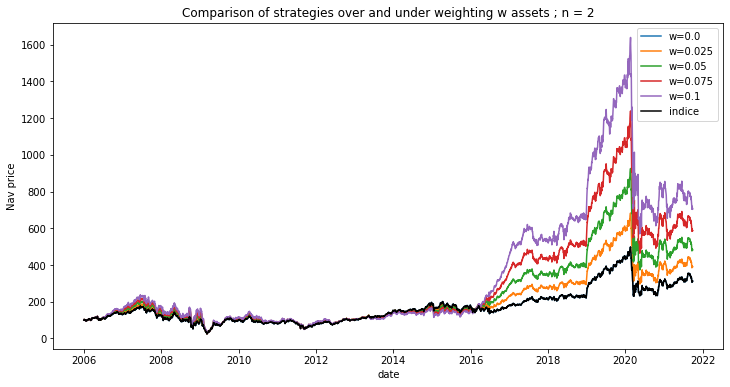

In [474]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_n_prices, lw=1.5, palette='tab10', dashes=False)
sns.lineplot(data=indice_price, lw=1.5, label='indice', color='black')
plt.title('Comparison of strategies over and under weighting w assets ; n = ' + str(n))
plt.xlabel('date')
plt.ylabel('Nav price')
plt.show()